In [1]:
import numpy as np
from leopardgecko import ConsistencyScore as lgcs
import matplotlib.pyplot as plt
import logging

#logging.basicConfig(level=logging.DEBUG)

Create several 3D arrays for testing.

# Consistency score labels

12 different arrays to simulate prediction ways

3 classes, background=0, label1 and label2

In [2]:
shape0 = (2,32,32)

In [3]:
data_ways=np.zeros((12,*shape0), dtype=np.uint8) # ways, z,y,x

In [4]:
for i in range(12):
    data0 = np.zeros(shape0,dtype=np.uint8)

    data0[:,:, 4:i*2+8 ]=1

    data0[:,0:4,:]=0
    data0[:,4:8,:]=1
    data0[:,8:12,:]=2

    #bar with most inconsistency
    data0[:,12:16,:]= i%3

    data_ways[i,...]=data0

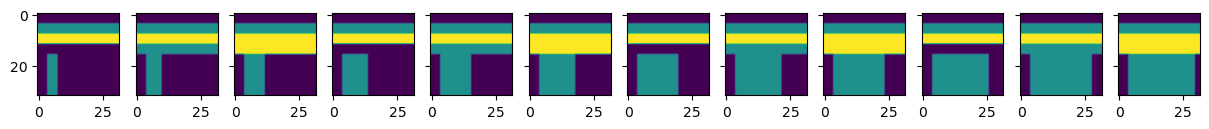

In [5]:
fig, axs = plt.subplots(1, 12, sharey=True, figsize=(15,4))

for i in range(12):
    axs[i].imshow(data_ways[i,0,:,:])

run consistency score calculation

In [6]:
cslabels = lgcs.getCScoreFromMultipleWayLabelsPred(data_ways)

In [7]:
cslabels.dtype

dtype('float32')

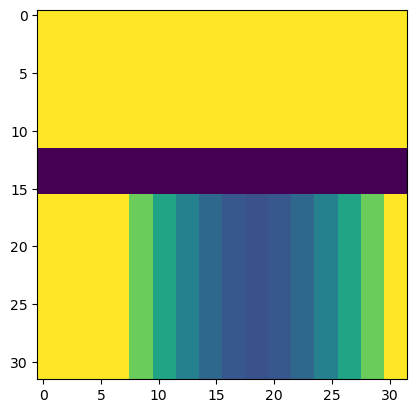

In [8]:
plt.imshow(cslabels[0,:,:])

In [9]:
cslabels[0,0,0]

1.0

In [10]:
cslabels.max()

1.0

In [11]:
cslabels.min()

-8.326673e-17

In [12]:
cslabels[0,20,:]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.7708333 , 0.7708333 ,
       0.5833333 , 0.5833333 , 0.4375    , 0.4375    , 0.33333334,
       0.33333334, 0.27083334, 0.27083334, 0.25      , 0.25      ,
       0.27083334, 0.27083334, 0.33333334, 0.33333334, 0.4375    ,
       0.4375    , 0.5833333 , 0.5833333 , 0.7708333 , 0.7708333 ,
       1.        , 1.        ], dtype=float32)

OK

In [35]:
print( np.allclose( cslabels[:,0:12,:], 1.0) )
print( np.allclose( cslabels[:,12:16,:], 0.0) )

True
True


In [36]:
exp_res_profile = np.array([1.        , 1.        , 1.        , 1.        , 1.        ,
    1.        , 1.        , 1.        , 0.7708333 , 0.7708333 ,
    0.5833333 , 0.5833333 , 0.4375    , 0.4375    , 0.33333334,
    0.33333334, 0.27083334, 0.27083334, 0.25      , 0.25      ,
    0.27083334, 0.27083334, 0.33333334, 0.33333334, 0.4375    ,
    0.4375    , 0.5833333 , 0.5833333 , 0.7708333 , 0.7708333 ,
    1.        , 1.        ]
)

print( np.allclose( exp_res_profile, cslabels[0,20,:]))

True


# test CS with Probabilities

In [13]:
shape1 = (*shape0,3) # z,y,x, class

In [14]:
pdata_ways=np.zeros((12,*shape1), dtype=np.float32) # ways, z,y,x, class
pdata_ways.shape

(12, 2, 32, 32, 3)

In [15]:
#Default. certainty for class 0
pdata_ways[:,:,:,:,0]=1
pdata_ways[:,:,:,:,1]=0
pdata_ways[:,:,:,:,2]=0

#Top bar, certainty for background in all ways
# no change needed

#Second bar, certainty for class 1
pdata_ways[:,:,4:8,:,0]=0
pdata_ways[:,:,4:8,:,1]=1
pdata_ways[:,:,4:8,:,2]=0

#Third bar, certainty for class 2
pdata_ways[:,:,8:12,:,0]=0
pdata_ways[:,:,8:12,:,1]=0
pdata_ways[:,:,8:12,:,2]=1

#Fourth bar, 1/3 for all
pdata_ways[:,:,12:16,:,0]=1.0/3.0
pdata_ways[:,:,12:16,:,1]=1.0/3.0
pdata_ways[:,:,12:16,:,2]=1.0/3.0

# Fifth bar, varying across ways, certainty depending on mod(ways)

for i in range(12):
    pdata_ways[i,:,16:20,:,0]= ((i%3)==0)*1
    pdata_ways[i,:,16:20,:,1]= (((i+2)%3) ==0)*1
    pdata_ways[i,:,16:20,:,2]= (((i+1)%3) ==0)*1

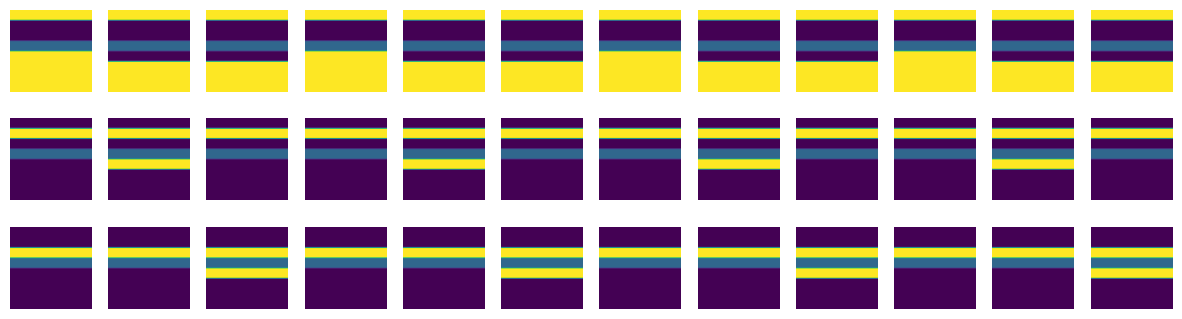

In [16]:
fig, axs = plt.subplots(3, 12, sharey=True, sharex=True, figsize=(15,4))

for iways in range(12):
    for iclass in range(3):
        ax=axs[iclass][iways]
        ax.imshow(pdata_ways[iways,0,:,:,iclass])
        ax.set_axis_off()

In [17]:
# Check it is acceptable probabilities, probsum=1

pdata_ways_probs_sum =np.sum(pdata_ways, axis=4)

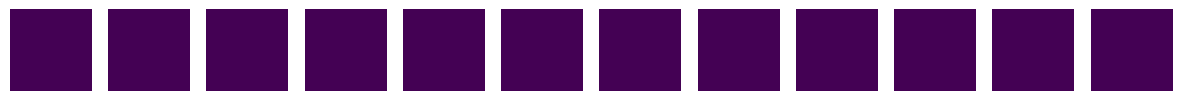

In [18]:
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True, figsize=(15,4))

for iways in range(12):
    ax=axs[iways]
    ax.imshow(pdata_ways_probs_sum[iways,0,:,:])
    ax.set_axis_off()

In [19]:
np.allclose(pdata_ways_probs_sum,1.0)

True

Calculate CS

In [20]:
csprobs = lgcs.getCScoreFromMultipleWayProbsPred(pdata_ways)

getCScoreFromAllProbsData(), Nways:12 , Nc:3


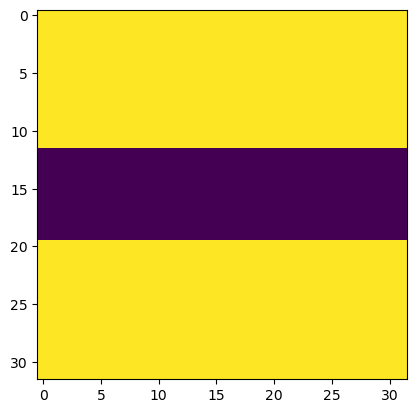

In [21]:
plt.imshow(csprobs[0,:,:])

In [22]:
print(csprobs.max())
print(csprobs.min())

0.99999994
0.0


In [40]:
csprobs[0,:,10]

array([9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       4.4703484e-08, 4.4703484e-08, 4.4703484e-08, 4.4703484e-08,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01,
       9.9999994e-01, 9.9999994e-01, 9.9999994e-01, 9.9999994e-01],
      dtype=float32)

In [41]:
print(np.allclose(csprobs[:,0:12,:], 1.0))
print(np.allclose(csprobs[:,12:20,:], 0.0, atol=1e-7))
print(np.allclose(csprobs[:,20:,:], 1.0))

True
True
True


# Test the Accumation feature to calculate scores from probability data

In [23]:
cs_cl = lgcs.cConsistencyScoreMultipleWayProbsAccumulate()

In [24]:
for iways in range(12):
    cs_cl.accumulate(pdata_ways[iways,...])

In [25]:
csprobs_acc = cs_cl.getCScore()

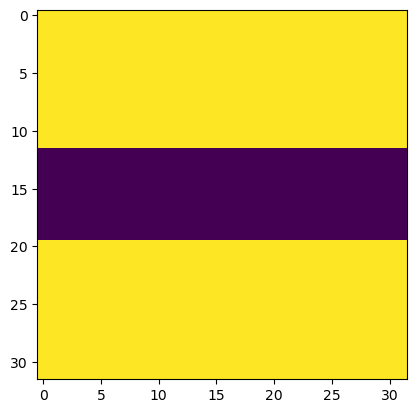

In [26]:
plt.imshow(csprobs_acc[0,:,:]) #looks different

Should be the same as previous bar calculation

In [27]:
cs_cl.probs_accum.shape

(2, 32, 32, 3)

In [28]:
cs_cl.probs_accum[0,15,0]

array([3.9999995, 3.9999995, 3.9999995], dtype=float32)

In [29]:
cs_cl.probs_accum[0,18,0]

array([4., 4., 4.], dtype=float32)

In [30]:
print(csprobs_acc.max())
print(csprobs_acc.min())

0.99999994
0.0


OK now!!